In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Flatten, MaxPooling2D, Dense, Dropout, Activation
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
import keras

In [0]:
import os

In [0]:
from tensorflow.keras.datasets import cifar10

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 21s 0us/step


In [0]:
y_train = to_categorical(num_classes=10,y=y_train)

In [0]:
x_train.shape

(50000, 32, 32, 3)

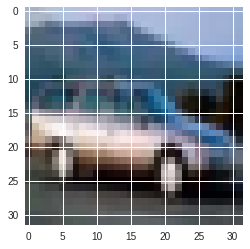

In [0]:
plt.imshow(x_train[4])

In [0]:
batch_size = 128
num_classes = 10
epochs = 100

In [0]:
x_train_train, x_val, y_train_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state = 69)

In [0]:
x_train_train = x_train_train/255.0
x_val = x_val/255.0

In [0]:
x_train_train.shape

(45000, 32, 32, 3)

In [0]:
model = Sequential()

In [0]:
model.add(Conv2D(32, (3, 3), input_shape=x_train_train.shape[1:], activation='relu', padding='same'))
model.add(Conv2D(32, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.8))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=2))
model.add(Dropout(0.8))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(num_classes, activation='softmax'))

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
__________

In [0]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 3054170917701071305
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 14369603402795747975
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 18222375605184421906
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 11281553818
locality {
  bus_id: 1
  links {
  }
}
incarnation: 9728762206219309990
physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"
]


In [0]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
tf.test.is_gpu_available

<function tensorflow.python.framework.test_util.is_gpu_available>

In [0]:
tf.test.gpu_device_name

<function tensorflow.python.framework.test_util.gpu_device_name>

In [0]:
myadam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

In [0]:
myadam

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
history = model.fit(x_train_train, y_train_train, validation_data=(x_val, y_val), epochs=epochs, batch_size=batch_size)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
45000/45000 [==============================] - 11s 240us/step - loss: 1.6361 - acc: 0.3869 - val_loss: 1.5869 - val_acc: 0.4208
Epoch 2/100
45000/45000 [==============================] - 10s 220us/step - loss: 1.6244 - acc: 0.3918 - val_loss: 1.5684 - val_acc: 0.4302
Epoch 3/100
45000/45000 [==============================] - 10s 222us/step - loss: 1.6048 - acc: 0.3987 - val_loss: 1.5339 - val_acc: 0.4416
Epoch 4/100
45000/45000 [==============================] - 10s 220us/step - loss: 1.6002 - acc: 0.4050 - val_loss: 1.5358 - val_acc: 0.4442
Epoch 5/100
45000/45000 [==============================] - 10s 221us/step - loss: 1.5960 - acc: 0.4027 - val_loss: 1.5354 - val_acc: 0.4428
Epoch 6/100
45000/45000 [==============================] - 10s 219us/step - loss: 1.5902 - acc: 0.4053 - val_loss: 1.5113 - val_acc: 0.4548
Epoch 7/100
45000/45000 [==============================] - 10s 222us/step - loss: 1.5841 - acc: 0.4082 - val_lo

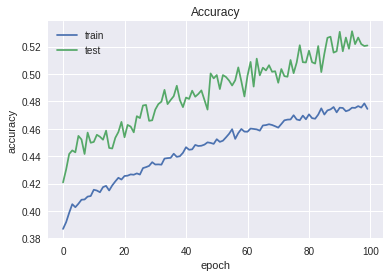

In [31]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])
plt.show()

In [32]:
x_test.shape

(10000, 32, 32, 3)

In [0]:
y_test = to_categorical(y_test, num_classes)

In [35]:
y_test.shape

(10000, 10)

In [37]:
x_test = x_test/255
x_test.shape

(10000, 32, 32, 3)

In [0]:
predictions = model.predict(x_test)

In [0]:
ans = np.argmax(predictions, axis=1)

In [0]:
y_test = np.argmax(y_test,axis=1)

In [41]:
print("test accuracy:", accuracy_score(y_test,ans))

test accuracy: 0.5251


In [42]:
confusion_matrix(y_test, ans)

array([[471,  86,  31,  46,   7,   4,  26,  18, 220,  91],
       [ 11, 824,   0,  10,   0,   2,  19,   4,  17, 113],
       [ 76,  19, 240, 131,  83,  72, 263,  37,  51,  28],
       [ 15,  19,  27, 392,  15, 118, 320,  28,  26,  40],
       [ 28,  22,  71, 105, 197,  39, 383, 114,  18,  23],
       [  9,   7,  34, 284,  26, 334, 228,  47,  13,  18],
       [  2,  13,  30,  71,  22,  11, 805,   6,  10,  30],
       [  9,  17,   4, 127,  19,  55, 116, 565,   7,  81],
       [ 89, 117,  10,  39,   1,   3,  10,   6, 679,  46],
       [ 11, 168,   1,  17,   0,   0,  28,   8,  23, 744]])